In [2]:
import sys
sys.path.append("../model/graph")

import cv2
import numpy as np

import matplotlib.pyplot as plt

from simulated_annealing import SimulatedAnnealing

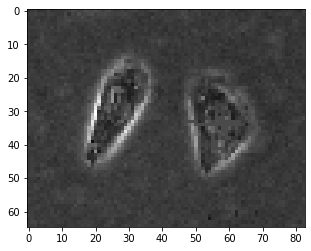

In [3]:
# Load sample image
imsample_twocells= cv2.imread("../asset/twocells.png").astype(np.uint8)

plt.imshow(imsample_twocells, cmap="Greys")

0 233
1 235
2 240
3 244
4 249
5 259
6 267
7 289
8 282
9 291
10 299
11 321
12 340
13 360
14 384
15 391
16 408
17 433
18 473
19 484
20 488
21 512
22 524
23 552
24 577
25 595
26 622
27 638
28 629
29 659
30 691
31 703
32 720
33 732
34 725
35 749
36 777
37 801
38 816
39 852
40 861
41 882
42 853
43 879
44 889
45 899
46 922
47 932
48 938
49 959
50 987
51 1000
52 1012
53 1023
54 1028
55 1059
56 1057
57 1055
58 1072
59 1063
60 1064
61 1097
62 1087
63 1145
64 1165
65 1170
66 1153
67 1144
68 1155
69 1123
70 1145
71 1146
72 1147
73 1116
74 1174
75 1197
76 1187
77 1207
78 1198
79 1246
80 1266
81 1290
82 1307
83 1264
84 1266
85 1262
86 1293
87 1280
88 1322
89 1312
90 1315
91 1332
92 1393
93 1377
94 1394
95 1447
96 1426
97 1446
98 1411
99 1430


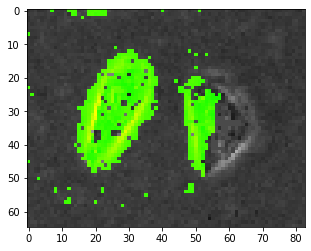

In [45]:
## Region growing

# Get input dimensions
height, width = imsample_twocells.shape

# Add seed points
seed = np.zeros_like(imsample_twocells[..., 0], dtype=np.uint8)
seed[:16, :16], seed[20:32, 24:32] = 1, 2

# Define model
model = SimulatedAnnealing(maxIter=100)

# Run
region = model.run(imsample_twocells[..., 0], seed)

# Plot
bgr = np.zeros((height, width, 3), dtype=np.uint8)
bgr[...] = imsample_gourd[..., np.newaxis]

pos = np.argwhere(region == 2)
for i, j in pos:
    bgr[i, j, 1], bgr[i, j, 2] = 255, 0
    
plt.imshow(bgr)